#### Import required libraries

In [2]:
import pandas as pd
import numpy as np
import json
import os

In [3]:
# printing current work directory and pandas version
print(os.getcwd())

print(pd.__version__)

C:\Users\Owner\Desktop\Amruta\CMPE256Project
1.0.5


#### Reading the reviews metadata into a dataframe

In [6]:
# taking reviews.json metadata path into a variable
json_metadata_path = r"C:\Users\Owner\Desktop\Amruta\CMPE256Project\LThingData\reviews.json"

In [9]:
import ast
# Read all lines into a list
with open(json_metadata_path) as f:
    json_content = f.readlines()

# Convert each list item to a dict
json_content = [ast.literal_eval(line) for line in json_content]

json_content

[{'work': '3206242',
  'flags': [],
  'unixtime': 1194393600,
  'stars': 5.0,
  'nhelpful': 0,
  'time': 'Nov 7, 2007',
  'comment': 'This a great book for young readers to be introduced to the world of Middle Earth. ',
  'user': 'van_stef'},
 {'work': '12198649',
  'flags': [],
  'unixtime': 1333756800,
  'stars': 5.0,
  'nhelpful': 0,
  'time': 'Apr 7, 2012',
  'comment': 'Help Wanted: Tales of On The Job Terror from Evil Jester Press is a fun and scary read. This book is edited by Peter Giglio and has short stories by Joe McKinney, Gary Brandner, Henry Snider and many more. As if work wasnt already scary enough, this book gives you more reasons to be scared. Help Wanted is an excellent anthology that includes some great stories by some master storytellers.\nOne of the stories includes Agnes: A Love Story by David C. Hayes, which tells the tale of a lawyer named Jack who feels unappreciated at work and by his wife so he starts a relationship with a photocopier. They get along well un

In [10]:
# converting the contents of the json file into a dataframe
reviews_df = pd.DataFrame(json_content)

In [11]:
# printing the dataframe
reviews_df

,work,flags,unixtime,stars,nhelpful,time,comment,user
0,3206242,[],1.194394e+09,5.0,0,"Nov 7, 2007",This a great book for young readers to be intr...,van_stef
1,12198649,[],1.333757e+09,5.0,0,"Apr 7, 2012",Help Wanted: Tales of On The Job Terror from E...,dwatson2
2,12533765,[],1.352938e+09,NaN,0,"Nov 15, 2012","Magoon, K. (2012). Fire in the streets. New Yo...",edspicer
3,12981302,[],1.364515e+09,4.0,0,"Mar 29, 2013","Well, I definitely liked this book better than...",amdrane2
4,5231009,[],1.270944e+09,3.0,0,"Apr 11, 2010",It's a nice science-fiction thriller with some...,Lila_Gustavus
...,...,...,...,...,...,...,...,...
1707065,5377722,[],1.376438e+09,3.0,0,"Aug 14, 2013","Yea, so, this is borderline my type of thing. ...",Jellyn
1707066,13302111,[],1.356739e+09,NaN,0,"Dec 29, 2012",solito pacco editoriale natalizio di monologhi...,ShanaPat
1707067,452711,[],1.220227e+09,4.0,0,"Sep 1, 2008",In The Last Dive: A Father and Sons Fatal Desc...,koeniel
1707068,3109878,[],1.195690e+09,NaN,2,"Nov 22, 2007",The Age of Turbulence by Alan Greenspan\nA Rev...,Ductor


In [12]:
# sorting the dataframe by work column
reviews_df.sort_values(by=['work'])

,work,flags,unixtime,stars,nhelpful,time,comment,user
326062,1000,[],1.274486e+09,0.5,2,"May 22, 2010",50 pages and gave up.,soffitta1
653788,1000,[],1.256688e+09,1.0,8,"Oct 28, 2009","I want to say something nice about this book, ...",melydia
758180,1000,[],1.177286e+09,0.5,7,"Apr 23, 2007","""Wild Animus is a search for the primordial, a...",cathepsut
662194,1000,[],1.149811e+09,2.0,3,"Jun 9, 2006",Interestingly weird. Kind of like watching a c...,elizabethraye
483195,1000,[],1.198714e+09,0.5,7,"Dec 27, 2007",I am one of those people who cant put down a b...,Julielovesbooks
...,...,...,...,...,...,...,...,...
975351,999982,[],1.362096e+09,NaN,1,"Mar 1, 2013",This was a BookCrossing swap that crossed my p...,Muscogulus
1332624,999986,[],1.373933e+09,NaN,0,"Jul 16, 2013",Dautres explorateurs pourront faire encore des...,raton-liseur
342273,999986,[],1.293322e+09,NaN,0,"Dec 26, 2010","En 1518 un portugus exiliado en Espaa, Fernand...",kika66
1206601,999986,[],1.375834e+09,5.0,0,"Aug 7, 2013","Bellissima biografia, ricca di spiegazioni, di...",zinf


In [13]:
# checking if the book id from DBpedia in present in librarything dataset for mapping
print(reviews_df[reviews_df['work'].str.contains('3471483')])

            work           flags      unixtime  stars  nhelpful          time  \
51782    3471483              []  1.210723e+09    NaN         0  May 14, 2008   
182731   3471483              []  1.191888e+09    5.0         0   Oct 9, 2007   
192663   3471483              []  1.173658e+09    4.5         0  Mar 12, 2007   
312994   3471483              []  1.256861e+09    1.0         0  Oct 30, 2009   
341778   3471483              []  1.210896e+09    4.0         0  May 16, 2008   
387087   3471483              []  1.330474e+09    4.0         0  Feb 29, 2012   
486227   3471483              []  1.291421e+09    3.0         0   Dec 4, 2010   
521295   3471483              []  1.292717e+09    4.0         0  Dec 19, 2010   
535972   3471483              []  1.304294e+09    4.0         0   May 2, 2011   
600023   3471483              []  1.313021e+09    5.0         0  Aug 11, 2011   
625291   3471483              []  1.221005e+09    4.0         0  Sep 10, 2008   
641392   3471483            

#### Reading the edges metadata into a dataframe

In [41]:
# reading the path of edges.txt into a variable
edges_metadata_path = r"C:\Users\Owner\Desktop\Amruta\CMPE256Project\LThingData\edges.txt"

In [42]:
# reading the data of the txt file into a dataframe and naming columns
edges_df = pd.read_csv(edges_metadata_path, header = None, sep = ' ', names = ["user", "trusted"])

In [43]:
# printing the dataframe
edges_df

,user,trusted
0,Rodo,anehan
1,Rodo,sevilemar
2,Rodo,dingsi
3,Rodo,slash
4,RelaxedReader,AnnRig
...,...,...
219785,Capfox,lampbane
219786,Capfox,maberry
219787,Capfox,raphinou
219788,Capfox,library1359


#### Reading the librarything mapping data into a dataframe

In [44]:
# storing the path of dbpedia file into a variable
dbpedia_file_path = r"C:\Users\Owner\Desktop\Amruta\CMPE256Project\LThingData\MappingLibrarything2DBpedia-1.2.tsv"

In [45]:
# reading the data of the dbpedia file into a dataframe and naming columns
dbpedia_file_df = pd.read_csv(dbpedia_file_path, header = None, delimiter = '\t', names = ["book_id", "book_name", "book_link"])

In [46]:
# printing dbpedia file data
dbpedia_file_df

,book_id,book_name,book_link
0,57176,A Case of Need,http://dbpedia.org/resource/A_Case_of_Need
1,2910,The Cat Who Knew a Cardinal,http://dbpedia.org/resource/The_Cat_Who_Knew_a...
2,323125,A Voyage to Arcturus,http://dbpedia.org/resource/A_Voyage_to_Arcturus
3,156627,Enemy of God,http://dbpedia.org/resource/Enemy_of_God_(novel)
4,16676,Commentaries on the Gallic War,http://dbpedia.org/resource/Commentarii_de_Bel...
...,...,...,...
11690,1229528,The Dead Fathers Club,http://dbpedia.org/resource/The_Dead_Fathers_Club
11691,49877,The Satyricon & The Apocolocyntosis of the Div...,http://dbpedia.org/resource/Satyricon
11692,180952,Dungeon Master's Guide II,http://dbpedia.org/resource/Dungeon_Master's_G...
11693,249237,No Cure for Cancer,http://dbpedia.org/resource/A_Cure_for_Cancer


In [47]:
# sorting the dbpedia file with book_id
dbpedia_file_df.sort_values(by=["book_id"])

,book_id,book_name,book_link
26,17,Freckle Juice,http://dbpedia.org/resource/Freckle_Juice
243,98,Chickenhawk,http://dbpedia.org/resource/Chickenhawk_(book)
268,107,Chasm City,http://dbpedia.org/resource/Chasm_City
282,109,Down and Out in the Magic Kingdom,http://dbpedia.org/resource/Down_and_Out_in_th...
296,110,Fairyland,http://dbpedia.org/resource/Fairyland_(series)
...,...,...,...
7273,3456674,Girls' Night in,http://dbpedia.org/resource/Girls_Night_In
6995,3459761,Gulliver's Travels,http://dbpedia.org/resource/Gulliver's_Travels
7524,3459870,"The Life and Opinions of Tristram Shandy, Gent...",http://dbpedia.org/resource/The_Life_and_Opini...
2134,3465620,Grimus,http://dbpedia.org/resource/Grimus


#### Mapping the book_ids from mapping file dataframe to reviews dataframe

In [48]:
# concatenating book name column from the dbpedia file df with reviews df on book_id(work)
u = reviews_df.sort_values('work')
v = dbpedia_file_df.sort_values("book_id")["book_name"].reset_index(drop=1)
out1 = pd.concat([u, v], 1)

In [49]:
out1

,work,flags,unixtime,stars,nhelpful,time,comment,user,book_name
0,3206242,[],1.194394e+09,5.0,0,"Nov 7, 2007",This a great book for young readers to be intr...,van_stef,Freckle Juice
1,12198649,[],1.333757e+09,5.0,0,"Apr 7, 2012",Help Wanted: Tales of On The Job Terror from E...,dwatson2,Chickenhawk
2,12533765,[],1.352938e+09,NaN,0,"Nov 15, 2012","Magoon, K. (2012). Fire in the streets. New Yo...",edspicer,Chasm City
3,12981302,[],1.364515e+09,4.0,0,"Mar 29, 2013","Well, I definitely liked this book better than...",amdrane2,Down and Out in the Magic Kingdom
4,5231009,[],1.270944e+09,3.0,0,"Apr 11, 2010",It's a nice science-fiction thriller with some...,Lila_Gustavus,Fairyland
...,...,...,...,...,...,...,...,...,...
1707065,5377722,[],1.376438e+09,3.0,0,"Aug 14, 2013","Yea, so, this is borderline my type of thing. ...",Jellyn,NaN
1707066,13302111,[],1.356739e+09,NaN,0,"Dec 29, 2012",solito pacco editoriale natalizio di monologhi...,ShanaPat,NaN
1707067,452711,[],1.220227e+09,4.0,0,"Sep 1, 2008",In The Last Dive: A Father and Sons Fatal Desc...,koeniel,NaN
1707068,3109878,[],1.195690e+09,NaN,2,"Nov 22, 2007",The Age of Turbulence by Alan Greenspan\nA Rev...,Ductor,NaN


In [50]:
# concatenating book link column from the dbpedia file df with reviews df on book_id(work)
x = out1.sort_values('work')
y = dbpedia_file_df.sort_values("book_id")["book_link"].reset_index(drop=1)
book_mapped_df = pd.concat([x,y], 1)

In [32]:
book_mapped_df

,work,flags,unixtime,stars,nhelpful,time,comment,user,book_name,book_link
0,3206242,[],1.194394e+09,5.0,0,"Nov 7, 2007",This a great book for young readers to be intr...,van_stef,Freckle Juice,http://dbpedia.org/resource/Freckle_Juice
1,12198649,[],1.333757e+09,5.0,0,"Apr 7, 2012",Help Wanted: Tales of On The Job Terror from E...,dwatson2,Chickenhawk,http://dbpedia.org/resource/Chickenhawk_(book)
2,12533765,[],1.352938e+09,NaN,0,"Nov 15, 2012","Magoon, K. (2012). Fire in the streets. New Yo...",edspicer,Chasm City,http://dbpedia.org/resource/Chasm_City
3,12981302,[],1.364515e+09,4.0,0,"Mar 29, 2013","Well, I definitely liked this book better than...",amdrane2,Down and Out in the Magic Kingdom,http://dbpedia.org/resource/Down_and_Out_in_th...
4,5231009,[],1.270944e+09,3.0,0,"Apr 11, 2010",It's a nice science-fiction thriller with some...,Lila_Gustavus,Fairyland,http://dbpedia.org/resource/Fairyland_(series)
...,...,...,...,...,...,...,...,...,...,...
1707065,5377722,[],1.376438e+09,3.0,0,"Aug 14, 2013","Yea, so, this is borderline my type of thing. ...",Jellyn,NaN,NaN
1707066,13302111,[],1.356739e+09,NaN,0,"Dec 29, 2012",solito pacco editoriale natalizio di monologhi...,ShanaPat,NaN,NaN
1707067,452711,[],1.220227e+09,4.0,0,"Sep 1, 2008",In The Last Dive: A Father and Sons Fatal Desc...,koeniel,NaN,NaN
1707068,3109878,[],1.195690e+09,NaN,2,"Nov 22, 2007",The Age of Turbulence by Alan Greenspan\nA Rev...,Ductor,NaN,NaN


In [51]:
# creating a final dataframe with edges dataframe merged into book mapping dataframe on user column
final_df = edges_df.merge(book_mapped_df, on='user')

In [52]:
final_df

,user,trusted,work,flags,unixtime,stars,nhelpful,time,comment,book_name,book_link
0,Rodo,anehan,2926113,[],1.250122e+09,3.0,0,"Aug 13, 2009","This book is enjoyable, but it doesn't quite m...",Vineland,http://dbpedia.org/resource/Vineland
1,Rodo,anehan,3116531,[],1.239667e+09,1.5,0,"Apr 14, 2009",I didn't expect much of this book when I bough...,NaN,NaN
2,Rodo,anehan,2044763,[],1.239667e+09,1.0,1,"Apr 14, 2009",I really can't recommend this books. I wanted ...,NaN,NaN
3,Rodo,anehan,58874,[],1.240790e+09,3.5,0,"Apr 27, 2009",If you are expecting a logical explanation of ...,NaN,NaN
4,Rodo,anehan,162191,[],1.240963e+09,4.0,0,"Apr 29, 2009",All traditions were new once upon a time. This...,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
23515719,Capfox,nataliepm,1805306,[],1.184285e+09,3.5,0,"Jul 13, 2007",This book turned out to be pretty good. Not gr...,NaN,NaN
23515720,Capfox,nataliepm,11337573,[],1.327277e+09,4.5,0,"Jan 23, 2012",Knowing who you are and where you belong is im...,NaN,NaN
23515721,Capfox,nataliepm,12409595,[],1.348272e+09,4.0,0,"Sep 22, 2012",It's rare these days for me to really find a n...,NaN,NaN
23515722,Capfox,nataliepm,6004672,[],1.227830e+09,4.0,0,"Nov 28, 2008",It's certainly viewed within my social circle ...,NaN,NaN


#### Performing Exploratory Data Analysis on the book mapped dataframe

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [38]:
# Get the distribution of the ratings
star_ratings = book_mapped_df['stars'].value_counts()
star_ratings

4.0    439640
5.0    339042
3.0    244615
3.5    116782
4.5     85599
2.0     79025
2.5     37063
1.0     28721
1.5      9571
0.5      7151
Name: stars, dtype: int64

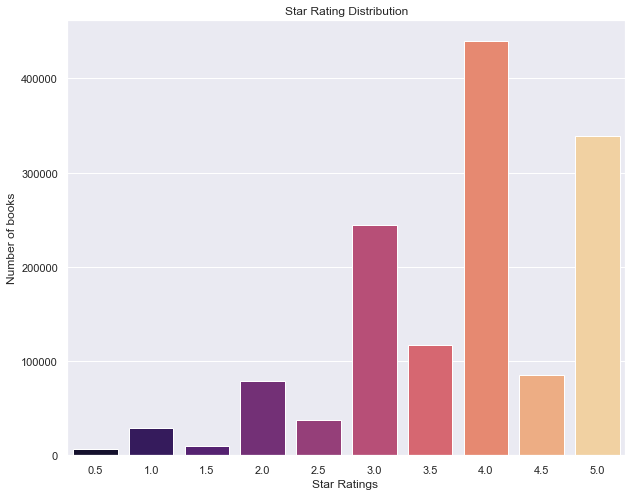

In [39]:
# plot
plt.figure(figsize=(10,8))
ax= sns.barplot(star_ratings.index, star_ratings.values, palette='magma')
plt.title("Star Rating Distribution")
plt.ylabel('Number of books')
plt.xlabel('Star Ratings ')

plt.show()

*From the above plot, we can observe that there are 439640 books that have a rating of 4, 339042 books have rating of 5 and rest of the books having a rating of 3.0, 3.5 and so on*

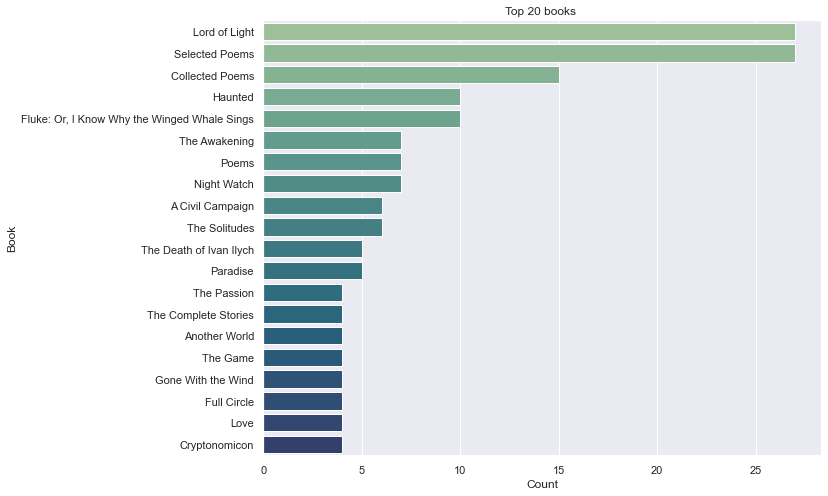

In [54]:
# plotting top 20 books read
bookCount = book_mapped_df['book_name'].value_counts()[:20]
bookCount

sns.set()
plt.figure(figsize=(10,8))
sns.barplot(x = bookCount.values, y = bookCount.index, palette='crest')
plt.title('Top 20 books ')
plt.xlabel('Count')
plt.ylabel('Book')

plt.show()

*From the plot above, we can observe that "Lord of Light" and "Selected Poems" are most read/rated, followed by "Collected Poems" and so on*

In [55]:
# plotting books rated every year 
rating_Time = book_mapped_df['time'].value_counts()
year = []
for yr in pd.to_datetime(book_mapped_df['time']):
    year.append(yr.year)

yearWise = pd.Series(year).value_counts()
yearWise

2013.0    266429
2011.0    264394
2010.0    253556
2009.0    241924
2012.0    240362
2008.0    195161
2007.0    154042
2006.0     72303
2005.0     12866
1969.0      5943
dtype: int64

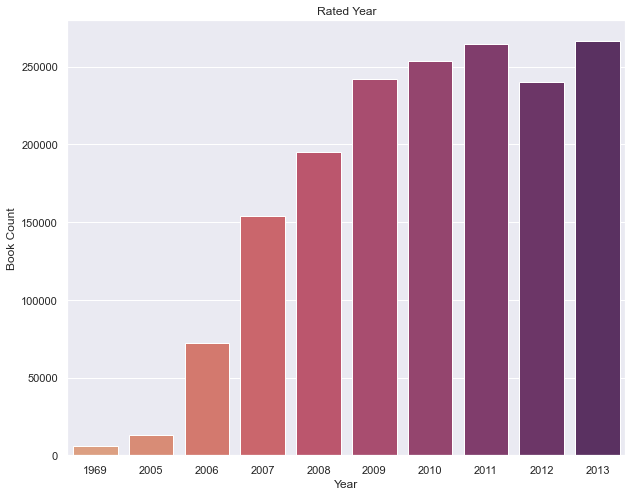

In [37]:
sns.set()
plt.figure(figsize=(10,8))
sns.barplot(x = yearWise.index.astype(int), y = yearWise.values, palette="flare")
plt.title('Rated Year')
plt.xlabel('Year')
plt.ylabel('Book Count')

plt.show()

*From the plot above, we can observe that most of the books are rated after 2008 and users did not used to rate books much*

In [139]:
book_mapped_df['nhelpful'].unique()

array([  0,   2,   1,   8,   5,   3,  15,  14,   4,   6,  33,  25,  12,
        20,  10,  13,   9,  17,  11,   7,  55,  21,  16,  29,  28,  18,
        30,  35,  40,  32,  19,  23,  38,  22,  63,  27,  31,  24,  71,
       129,  37,  34,  74,  41,  78,  26, 130,  46,  72, 108,  82,  58,
        79,  39,  67,  44,  76,  87, 189,  52,  50, 152,  48,  59,  68,
       131,  75,  66,  43,  36,  53,  60,  47, 332,  49,  77, 100,  65,
       316,  91,  70, 202,  45], dtype=int64)

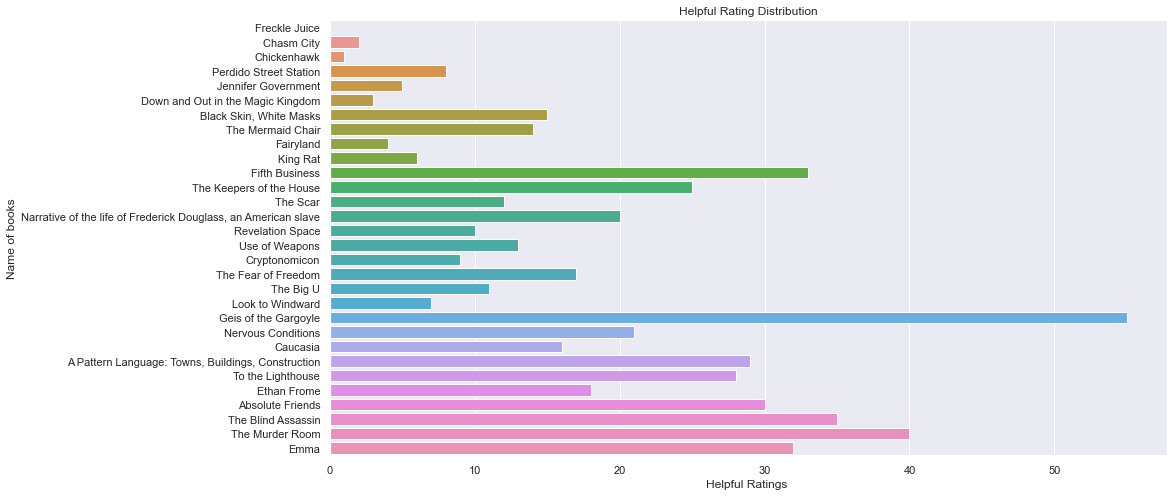

In [172]:
#Get the distribution of the ratings
helpful_ratings = book_mapped_df.loc[book_mapped_df['nhelpful'].unique(), 'book_name'][0:30]
helpful_ratings
#plot
plt.figure(figsize=(15,8))
ax= sns.barplot(helpful_ratings.index, helpful_ratings.values)
plt.title("Helpful Rating Distribution")
plt.ylabel('Book Name')
plt.xlabel('Helpful Ratings ')

plt.show()

*From the plot above, we can observe that "Geis of the Gargoyle" and "The Murder Room" have most helpful ratings count as compared to other books*